In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#plt.style.use("seaborn-whitegrid")
from scipy import stats
import seaborn as sns

from collections import Counter

import warnings



In [2]:
df = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')

## 1. Exploratory Data Analysis

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset consists of 10 metrics for 5110 patients.
In which We have 8 categorical
columns(gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,stroke) 
and 3 continous columns(age, avg_glucose_level,bmi)


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Filling missing values

In [7]:
df['bmi'].fillna(value = 28, inplace = True)

In [8]:
df.drop('id',axis = 1,inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Exploring each variable

In [10]:
def bar_plot(variable):
      
    # get feature 
    var = df[variable]
    # count number of feature 
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

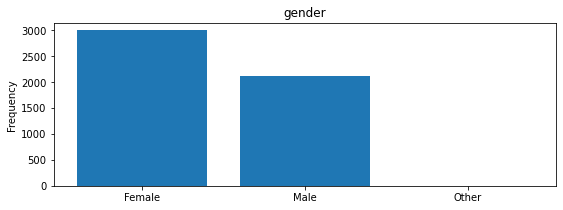

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


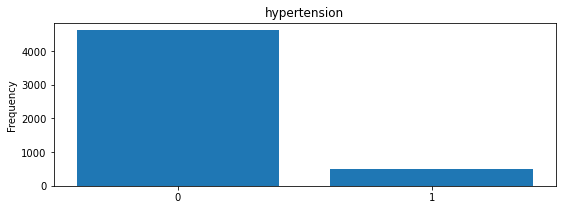

hypertension:
0    4612
1     498
Name: hypertension, dtype: int64


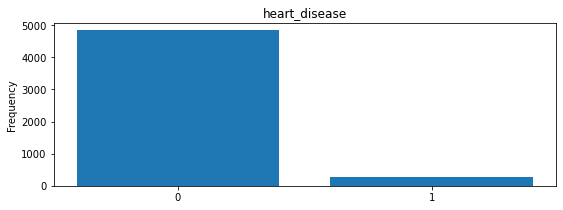

heart_disease:
0    4834
1     276
Name: heart_disease, dtype: int64


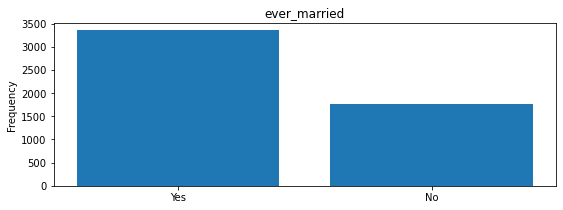

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


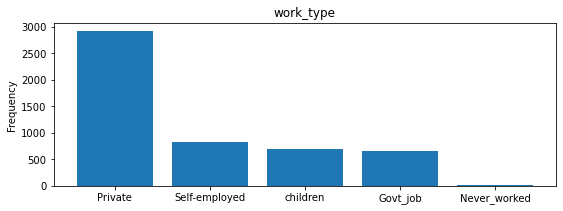

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


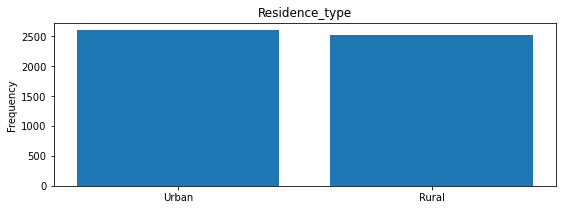

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


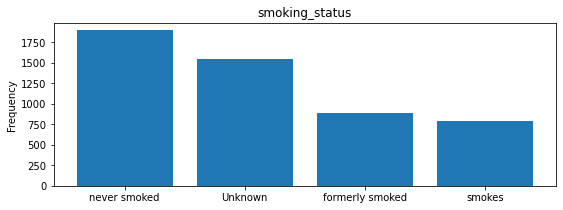

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


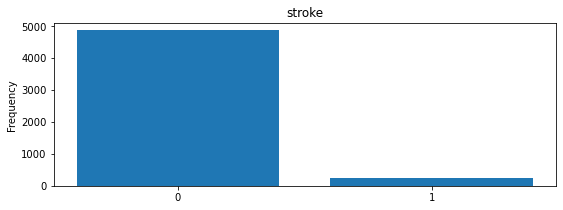

stroke:
0    4861
1     249
Name: stroke, dtype: int64


In [11]:
category1 = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
for c in category1:
    bar_plot(c)

In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

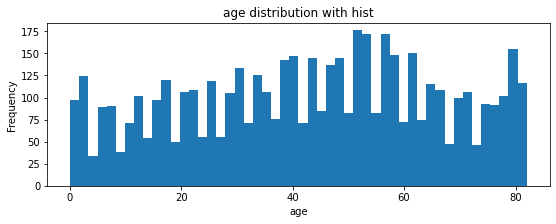

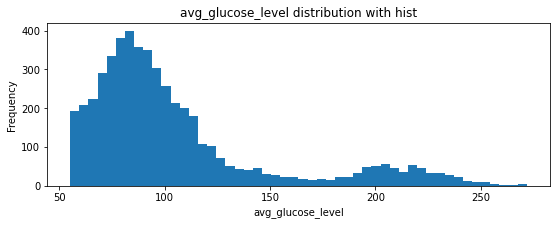

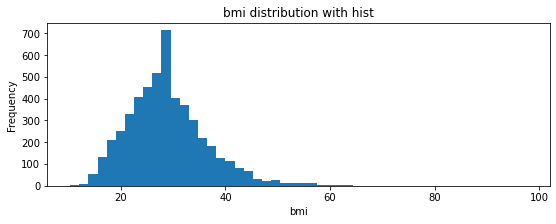

In [13]:
numericVar = ["age","avg_glucose_level","bmi"]
for n in numericVar:
    plot_hist(n)

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

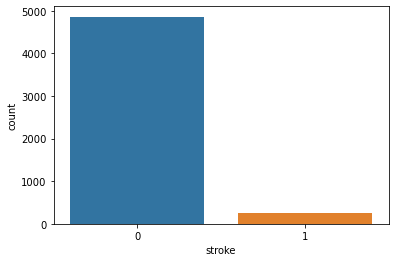

In [117]:
sns.countplot(df['stroke'])

It is a highly imbalanced data

In [19]:
df[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending=False)

,smoking_status,stroke
1,formerly smoked,0.079096
3,smokes,0.053232
2,never smoked,0.047569
0,Unknown,0.030440


C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

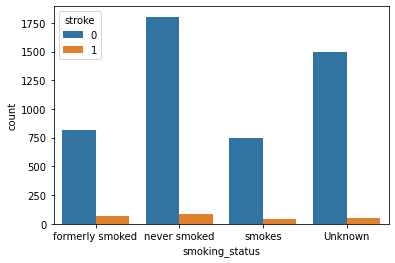

In [14]:
sns.countplot(df['smoking_status'], hue = df['stroke'])

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


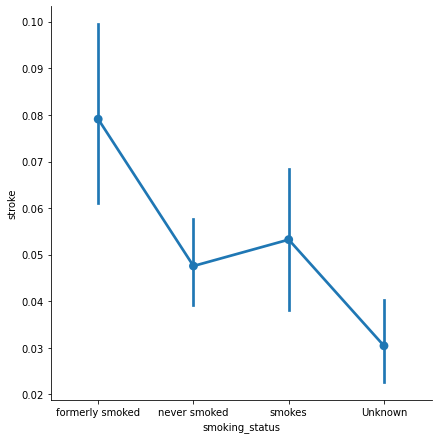

In [20]:
sns.factorplot(x = 'smoking_status',y = 'stroke', data = df,size = 6)

 By seeing smoking_status we can say smoking is a risk factor for stroke

In [17]:
df[["work_type","stroke"]].groupby(["work_type"], as_index = False).mean().sort_values(by="stroke",ascending=False)

,work_type,stroke
3,Self-employed,0.079365
2,Private,0.050940
0,Govt_job,0.050228
4,children,0.002911
1,Never_worked,0.000000


C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


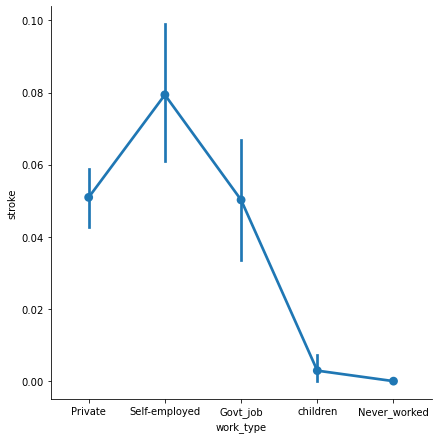

In [18]:
sns.factorplot(x = 'work_type',y = 'stroke', data = df,size = 6)

Self-employed peaople are deffinetely getting more strokes than any other group

In [21]:
df[["Residence_type","stroke"]].groupby(["Residence_type"], as_index = False).mean().sort_values(by="stroke",ascending=False)

,Residence_type,stroke
1,Urban,0.052003
0,Rural,0.045346


C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


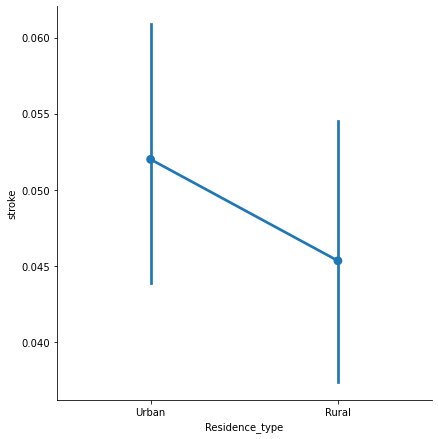

In [22]:
sns.factorplot(x = 'Residence_type',y = 'stroke', data = df,size = 6)

living conditions do affect the health, but in this these are hardly affecting strokes

In [23]:
df[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).mean().sort_values(by="stroke",ascending=False)

,ever_married,stroke
1,Yes,0.065613
0,No,0.016505


C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

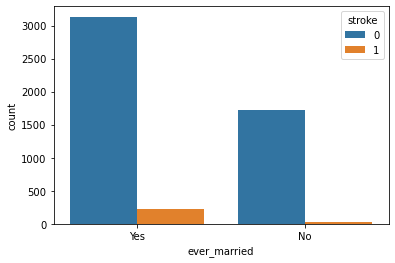

In [15]:
sns.countplot(df['ever_married'], hue= df['stroke'])

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


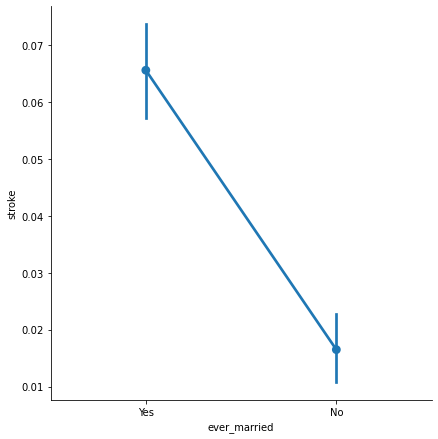

In [24]:
sns.factorplot(x = 'ever_married',y = 'stroke', data = df,size = 6)

married people are getting more strokes than unmarried people

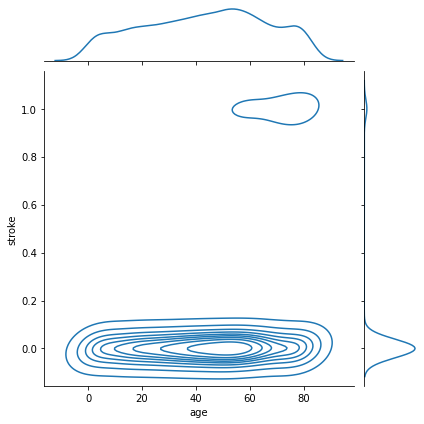

In [25]:
sns.jointplot(x = 'age',y = 'stroke',data = df ,kind = 'kde')

Through age vs stroke plot we can clearly see there is higher risk of stroke as peaople getting older

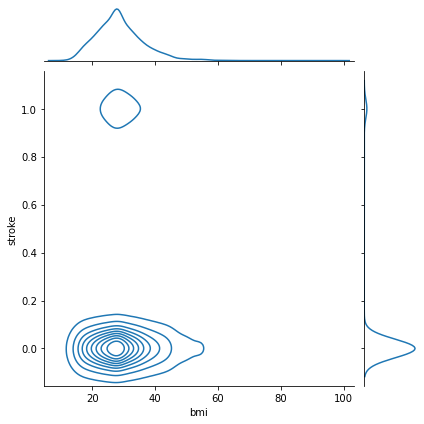

In [26]:
sns.jointplot(x = 'bmi',y = 'stroke',data = df ,kind = 'kde')

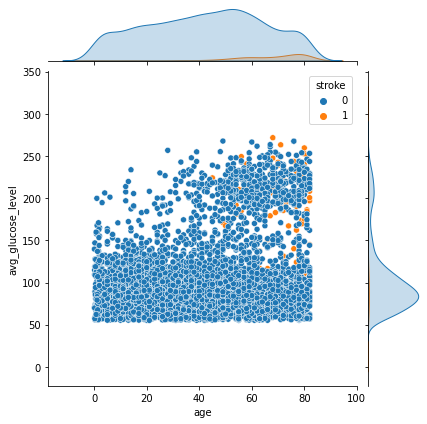

In [27]:
sns.jointplot(x = 'age',y = 'avg_glucose_level',data = df ,hue = 'stroke',kind = 'scatter')

With more age and high glucose level the risk of getting a stroke is higher

# Encoding Categorical Data

In [28]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
#Encoding gender variable

df['gender']=enc.fit_transform(df['gender'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
df['ever_married']=enc.fit_transform(df['ever_married'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,28.0,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)
#Check

df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0,1,1,0,0
1,0,61.0,0,0,1,202.21,28.0,1,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,171.23,34.4,1,0,1,0,0,1,0,0,1
4,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0,0,0,1,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int32  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int32  
 5   avg_glucose_level               5110 non-null   float64
 6   bmi                             5110 non-null   float64
 7   stroke                          5110 non-null   int64  
 8   work_type_Never_worked          5110 non-null   uint8  
 9   work_type_Private               5110 non-null   uint8  
 10  work_type_Self-employed         5110 non-null   uint8  
 11  work_type_children              5110 non-null   uint8  
 12  Residence_type_Urban            51

<AxesSubplot:>

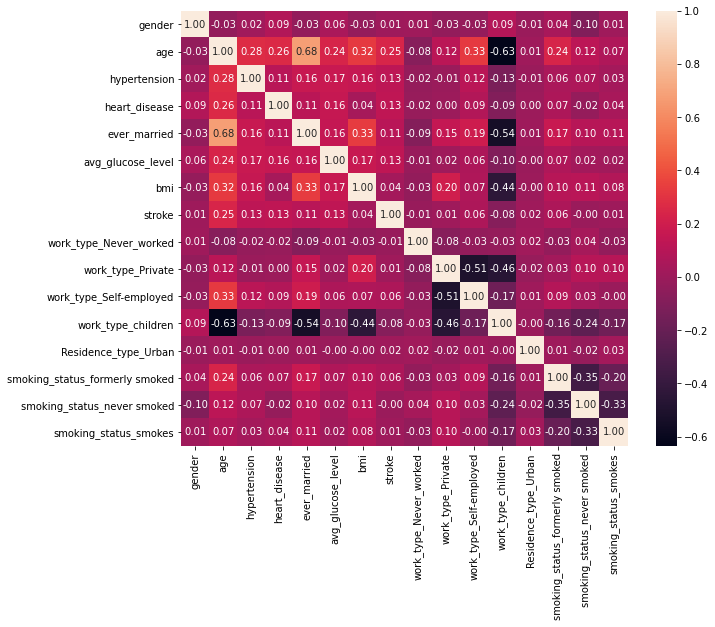

In [32]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True,fmt = '.2f')

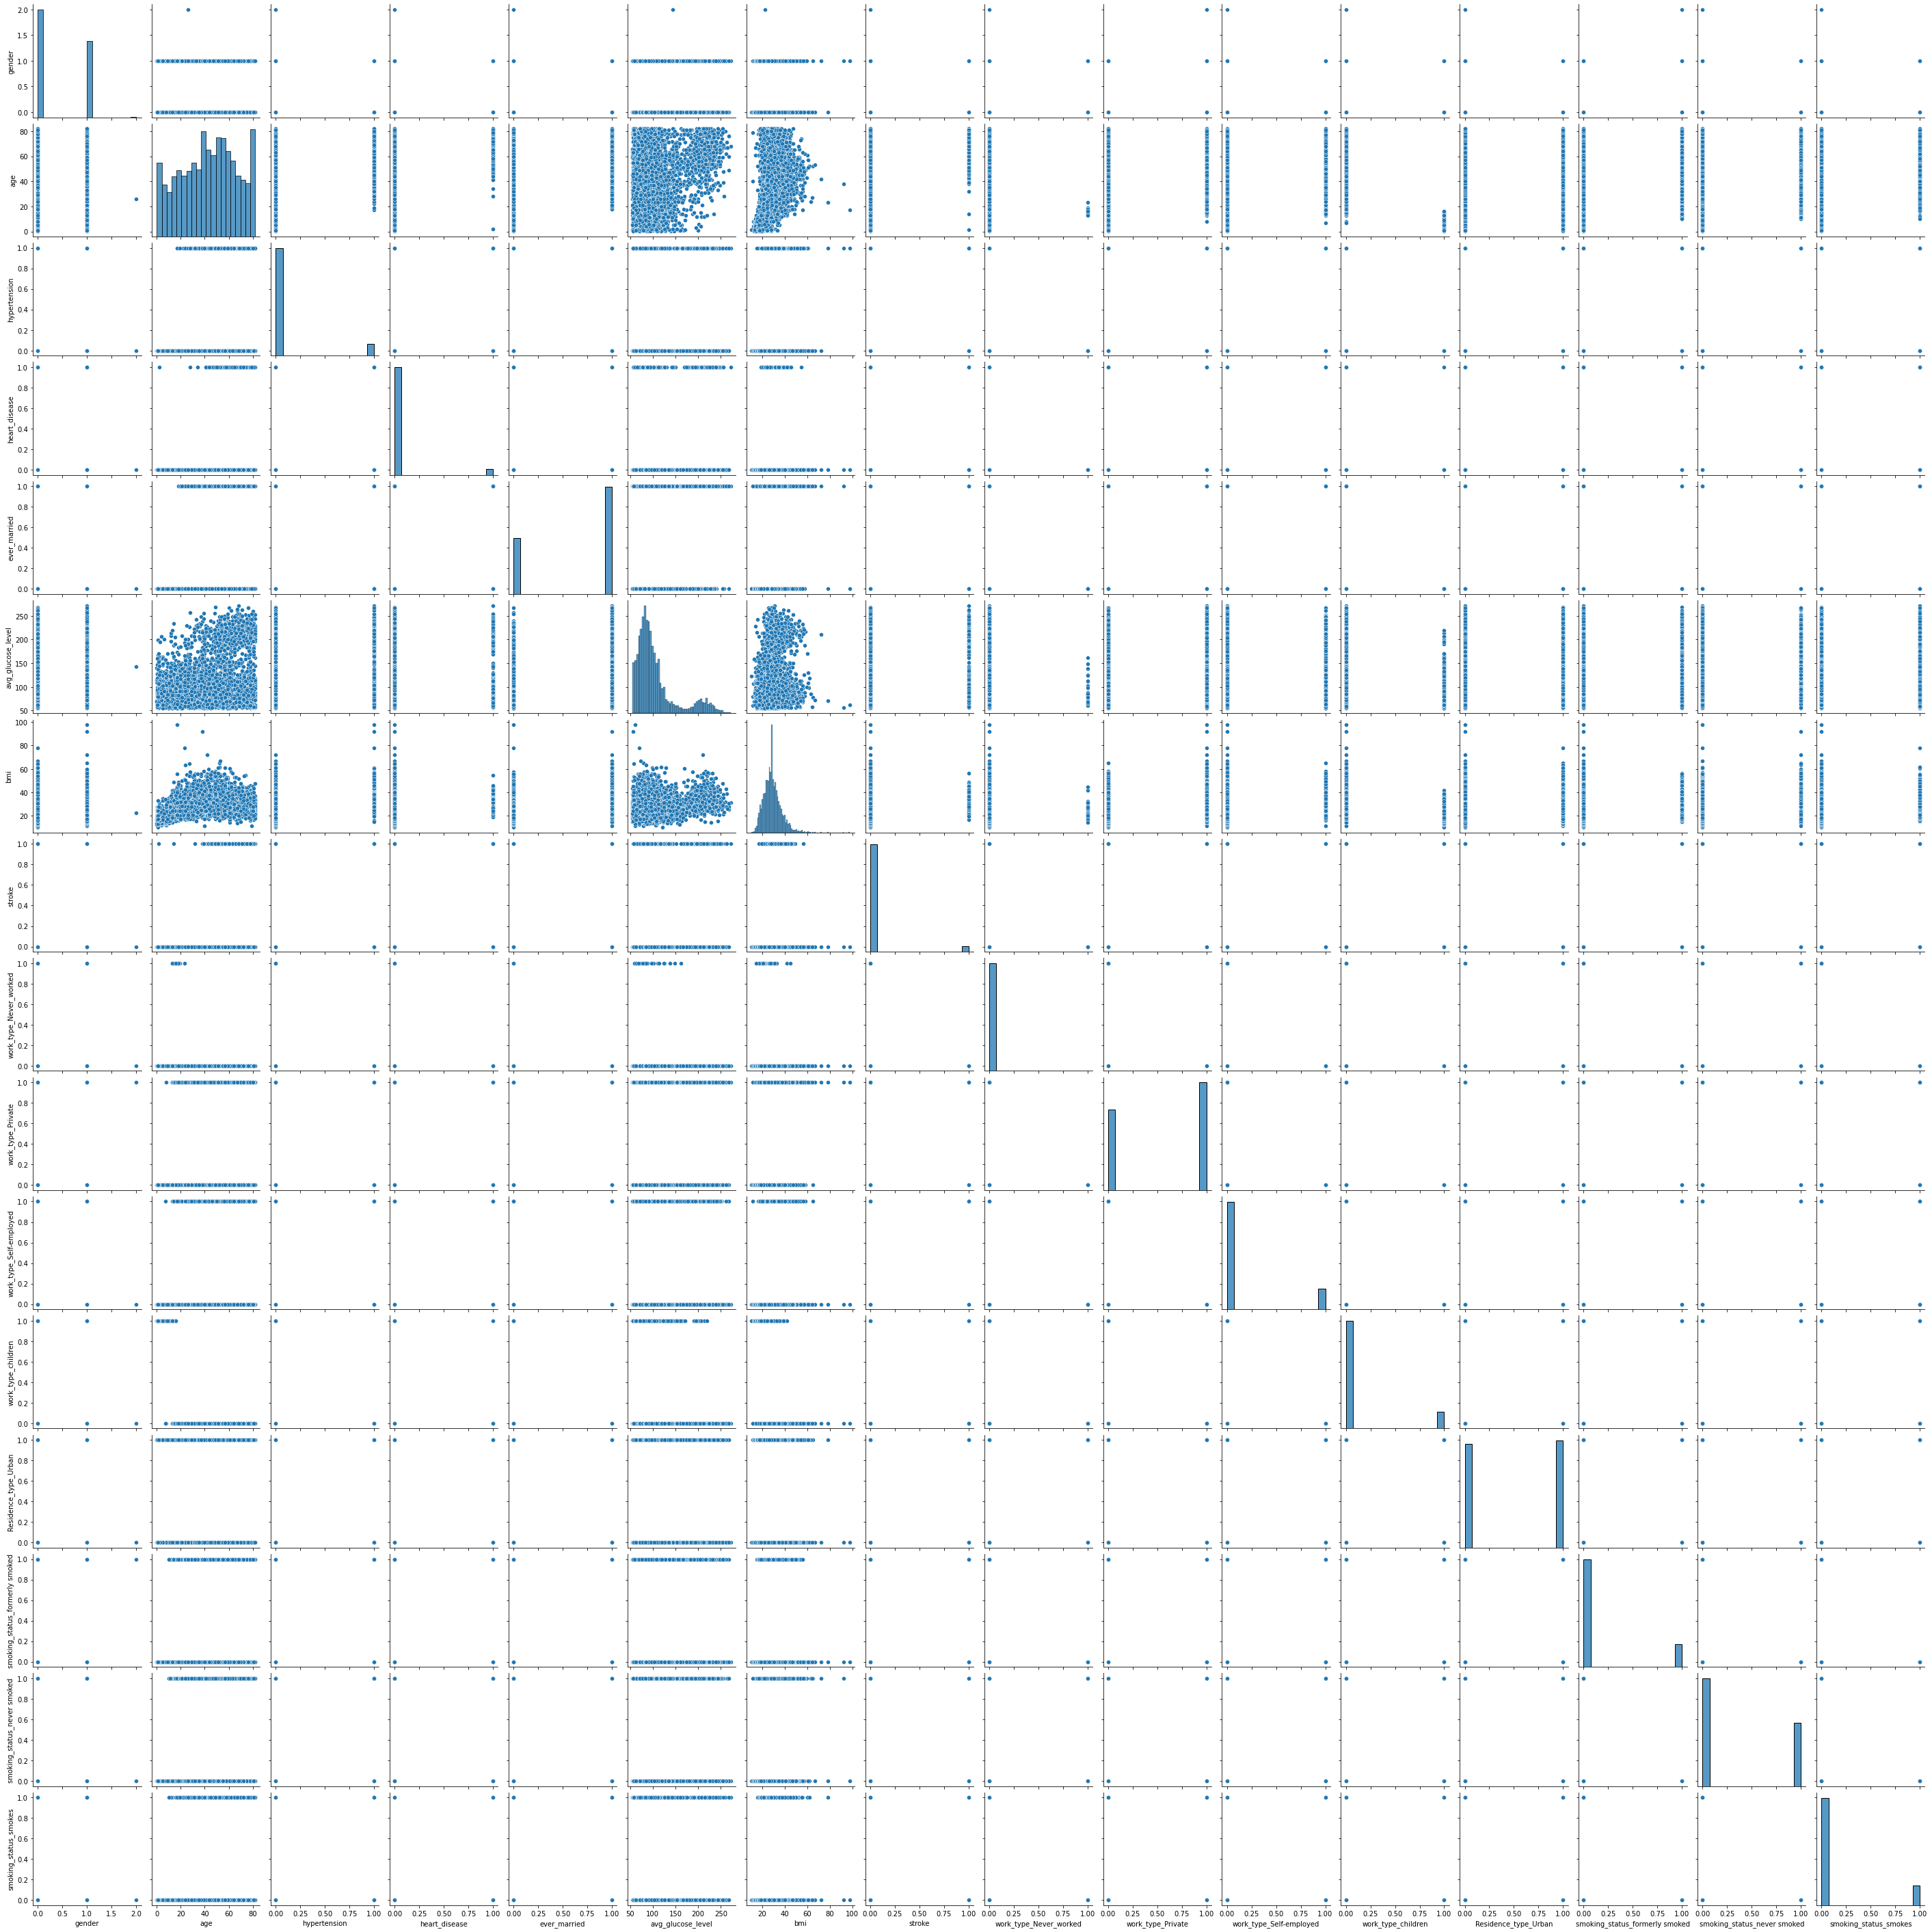

In [33]:
sns.pairplot(df)

In [34]:
y=df['stroke']

In [35]:
X = df.drop('stroke',axis = 1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Applying machine learning algorithms


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3901.0  187.0       1.0     4088.0        4088.0
_______________________________________________
Confusion Matrix: 
 [[3901    0]
 [   0  187]]

Test Result:
Accuracy Score: 90.70%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy    macro avg  weighted avg
precision    0.949117   0.220339  0.907045     0.584728      0.904906
recall       0.952083   0.209677  0.907045     0.580880      0.907045
f1-score     0.950598   0.214876  0.907045     0.582737      0.905965
support    960.000000  62.000000  0.907045  1022.000000   1022.000000
______________________________________

As we can see the model has high varience and it is overfitting therefore we have to use hyperparameter tuning to lower the variance

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1,4))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit ( X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit( X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 684 candidates, totalling 3420 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 95.47%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.955169    0.666667  0.954746     0.810918      0.941972
recall        0.999487    0.021390  0.954746     0.510439      0.954746
f1-score      0.976826    0.041451  0.954746     0.509138      0.934038
support    3901.000000  187.000000  0.954746  4088.000000   4088.000000
_______________________________________________
Confusion Matrix: 
 [[3899    2]
 [ 183    4]]

Test Result:
Accuracy Score: 93.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy    macro avg  weighted avg
precision    0.939335   0.0  0.939335     0.469667      0.882350
recall       

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In the confusion matrix we can see as it is a highly Imbalanced data thats why it is not predicting for 1st class 

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.24%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.994127    0.953488  0.992417     0.973808      0.992268
recall        0.997949    0.877005  0.992417     0.937477      0.992417
f1-score      0.996034    0.913649  0.992417     0.954842      0.992266
support    3901.000000  187.000000  0.992417  4088.000000   4088.000000
_______________________________________________
Confusion Matrix: 
 [[3893    8]
 [  23  164]]

Test Result:
Accuracy Score: 93.15%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy    macro avg  weighted avg
precision    0.939723   0.100000  0.931507     0.519862      0.888781
recall       0.990625   0.016129  0.931507     0.503377      0.931507
f1-score     0.964503   0.027778  0.931507     0.496140      0.907676
support    960.000000  62.000000  0.931507  1022.

In [42]:
n_estimators = [100, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5,7,9]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth}# 'min_samples_split': min_samples_split,
             #  'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="recall", cv=5, verbose=1, n_jobs=-1)


rf_cv.fit( X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit( X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'max_depth': 9, 'max_features': 'auto', 'n_estimators': 100}
Train Result:
Accuracy Score: 96.14%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.961074    1.000000   0.96135     0.980537      0.962855
recall        1.000000    0.155080   0.96135     0.577540      0.961350
f1-score      0.980151    0.268519   0.96135     0.624335      0.947598
support    3901.000000  187.000000   0.96135  4088.000000   4088.000000
_______________________________________________
Confusion Matrix: 
 [[3901    0]
 [ 158   29]]

Test Result:
Accuracy Score: 93.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy    macro avg  weighted avg
precision    0.939335   0.0  0.939335     0.469667      0.882350
recall       1.000000   0.0  0.939335     0.500000      0.

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Same is happening in RFs also because of imbalanced data

Therefore we are using 3 techniques to handle imbalanced data
1).Upsampling
2).Downsampling
3)SMOTE


In [43]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.stroke==0]
df_minority = df[df.stroke==1]

print(df_majority.stroke.count())
print("-----------")
print(df_minority.stroke.count())
print("-----------")
print(df.stroke.value_counts())

4861
-----------
249
-----------
0    4861
1     249
Name: stroke, dtype: int64


In [44]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4861,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.stroke.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [45]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=249,     # to match minority class
                                 random_state=24) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.stroke.value_counts()

1    249
0    249
Name: stroke, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())
print(y_SMOTE.value_counts())

7802
3901
1    3901
0    3901
Name: stroke, dtype: int64


In [47]:
y_upsampled = df_upsampled.stroke
X_upsampled = df_upsampled.drop(['stroke'], axis= 1)

In [48]:
y_downsampled = df_downsampled.stroke
X_downsampled = df_downsampled.drop(['stroke'], axis = 1)

In [57]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf,X_upsampled,y_upsampled, X_test, y_test, train=True)
print_score(tree_clf,X_upsampled,y_upsampled, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.81%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.835938     0.988390  0.898066     0.912164      0.912164
recall        0.990537     0.805596  0.898066     0.898066      0.898066
f1-score      0.906694     0.887680  0.898066     0.897187      0.897187
support    4861.000000  4861.000000  0.898066  9722.000000   9722.000000
_______________________________________________
Confusion Matrix: 
 [[4815   46]
 [ 945 3916]]

Test Result:
Accuracy Score: 90.70%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy    macro avg  weighted avg
precision    0.949117   0.220339  0.907045     0.584728      0.904906
recall       0.952083   0.209677  0.907045     0.580880      0.907045
f1-score     0.950598   0.214876  0.907045     0.582737      0.905965
support    960.000000  62.000000  0.907045  

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1,12))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit (X_upsampled, y_upsampled)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_upsampled, y_upsampled)
print_score(tree_clf,X_upsampled, y_upsampled, X_test, y_test, train=True)
print_score(tree_clf,X_upsampled, y_upsampled, X_test, y_test, train=False)

Fitting 5 folds for each of 2508 candidates, totalling 12540 fits
Best paramters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 94.77%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     1.000000     0.905383  0.947747     0.952691      0.952691
recall        0.895495     1.000000  0.947747     0.947747      0.947747
f1-score      0.944867     0.950342  0.947747     0.947604      0.947604
support    4861.000000  4861.000000  0.947747  9722.000000   9722.000000
_______________________________________________
Confusion Matrix: 
 [[4353  508]
 [   0 4861]]

Test Result:
Accuracy Score: 90.61%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy    macro avg  weighted avg
precision    1.000000   0.392405  0.906067     0.696203      0.96

By checking all three techniques the best recall we get with UPsampling 

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.07%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.990602    0.993377  0.990705     0.991990      0.990729
recall        0.999744    0.802139  0.990705     0.900941      0.990705
f1-score      0.995152    0.887574  0.990705     0.941363      0.990231
support    3901.000000  187.000000  0.990705  4088.000000   4088.000000
_______________________________________________
Confusion Matrix: 
 [[3900    1]
 [  37  150]]

Test Result:
Accuracy Score: 93.64%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy    macro avg  weighted avg
precision    0.944389   0.400000  0.936399     0.672195      0.911364
recall       0.990625   0.096774  0.936399     0.543700      0.936399
f1-score     0.966955   0.155844  0.936399     0.561399      0.917748
support    960.000000  62.000000  0.936399  1022.

In [105]:
n_estimators = [100, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5,7,9,12]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth}# 'min_samples_split': min_samples_split,
             #  'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="recall", cv=5, verbose=1, n_jobs=-1)


rf_cv.fit(X_upsampled,y_upsampled)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_upsampled,y_upsampled)

print_score(rf_clf,X_upsampled,y_upsampled, X_test, y_test, train=True)
print_score(rf_clf,X_upsampled,y_upsampled, X_test, y_test, train=False)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}
Train Result:
Accuracy Score: 98.67%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     1.000000     0.974148  0.986731     0.987074      0.987074
recall        0.973462     1.000000  0.986731     0.986731      0.986731
f1-score      0.986553     0.986905  0.986731     0.986729      0.986729
support    4861.000000  4861.000000  0.986731  9722.000000   9722.000000
_______________________________________________
Confusion Matrix: 
 [[4732  129]
 [   0 4861]]

Test Result:
Accuracy Score: 97.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy    macro avg  weighted avg
precision    1.000000   0.720930  0.976517     0.860465      0.983070
recall       0.975000   1.000000  0.976517

After tuning with various parameters this is the highest accuracy we get with RFs with highle generalizable model and  with best Recall

# Creating the feature importances dataframe

In [99]:

feature_importance = np.array(rf_clf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})

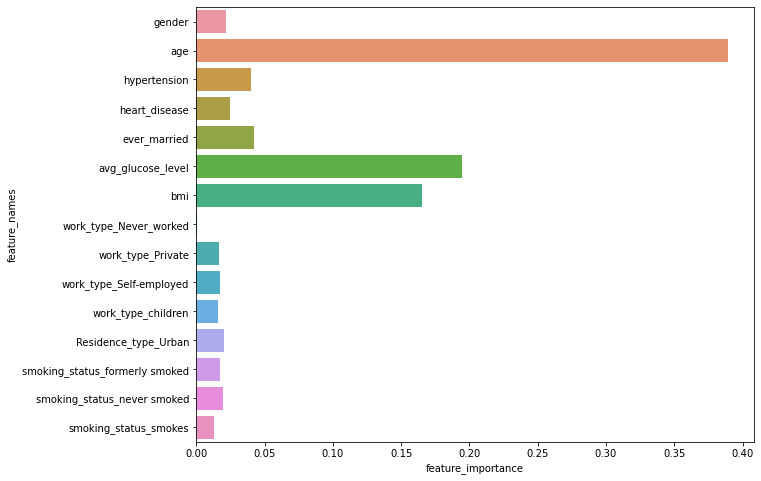

In [100]:
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp['feature_importance'], y=feat_imp['feature_names'])
plt.savefig('stroke_feature_imp.png')

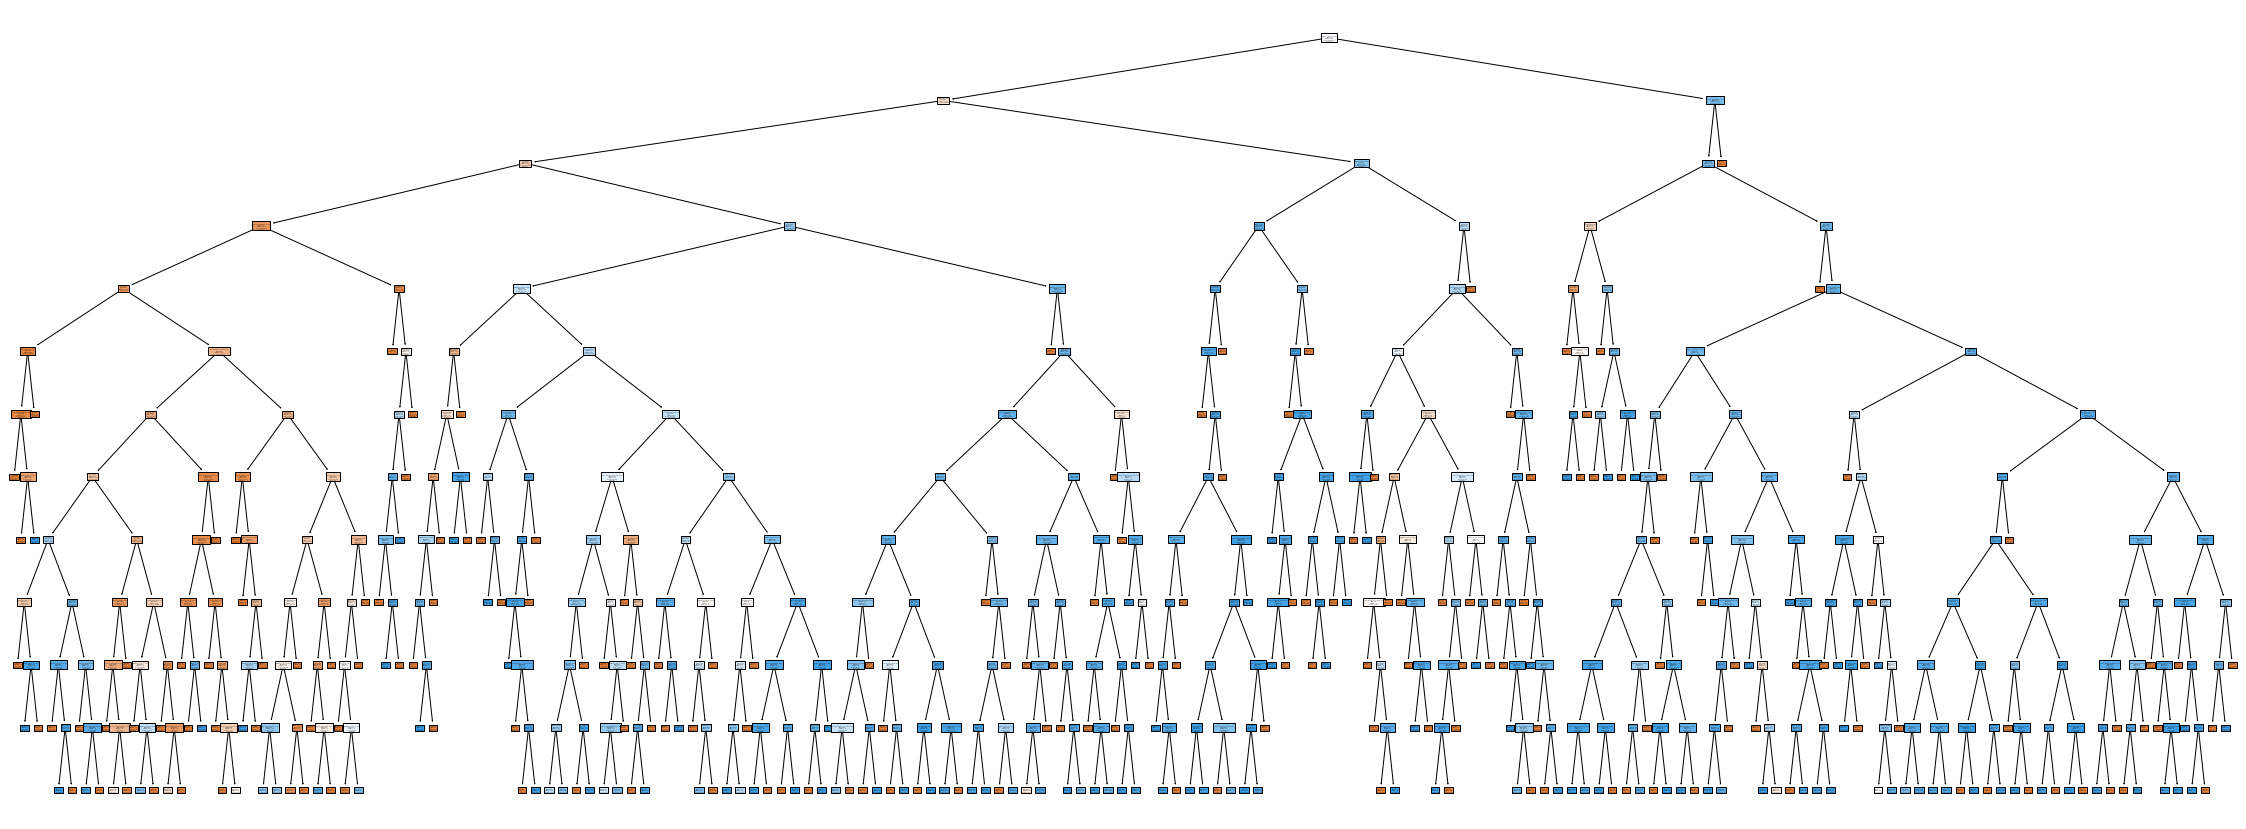

In [102]:
from sklearn import tree
fn = df.columns
cn = ["Yes","No"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,15))

tree.plot_tree(rf_clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.savefig('stroke_over_tree.png')